# Chargement et traitement données OpenPose et Motion Capture

Les vidéos étant trop volumineuses, elles ne sont pas disponibles sur le github. Voici une capture d'écran de la vidéo après traitement OpenPose :

<div>
<img src="img\capture_ecran_openpose.png", width="480">
<div\>
    
On peut remarquer qu'une partie de la vidéo est floutée, le but était de cacher la deuxième personne présente sur la vidéo.

# ToDo
- (X) Retourner vidéo OpenPose
- (X) Synchronisation temporelle manuelle
- () Synchronisation temporelle automatique
- (X) Comparaison simple évolution des coordonnées (même si on sait que ce n'est pas le même repère)
- () Nouvelle acquisition en notant position de la caméra pour synchronisation spatiale
- () Tracer différence MoCap/tracking en fonction de la confiance c
- (X) Animer Mocap et Tracking
- () Projection 2D du mocap sur plan caméra et comparaison
- () Projection 3D tracking et comparaison
- () Remplacer les 0 tracking par anciennes positions
- () Comparer périmètre du carré avec MoCap et périmètre réel
- () Mettre capture d'écran et éventuellement lien vers la vidéo
- () Tracer vitesse et accélération des marqueurs
- () Lissage des données
- () Tracer évolution de la confiance pour openpose

# Motion Capture
## Récupération des données

Le fichier csv nécessite une modification à la main avant d'être chagré. Voici les étapes à suivre :
* supprimer les 5 premières lignes
* supprimer la ligne mm et la colonne subframe
* remplir les cases au dessus de Y et Z avec le nom du marker

In [5]:
import pandas as pd
mocap_data = pd.read_csv("211019_NicoGabin_MoCapCarre-Copie.csv", sep=',', index_col=[0], header=[0,1]) 

In [6]:
mocap_data

Nico1:epd1                    Nico1:epd2                    Nico1:bd2  \
Frame          X         Y        Z          X         Y        Z         X   
1        529.098   972.780  1507.33    144.311   787.576  1500.84   573.275   
2        527.486   974.043  1507.15    145.144   789.580  1500.57   567.770   
3        525.752   975.190  1506.97    145.791   790.930  1500.59   562.150   
4        523.852   974.707  1506.16    146.356   791.980  1500.72   556.158   
5        522.568   975.767  1506.22    146.834   792.955  1500.97   550.296   
6        521.538   977.016  1506.68    146.898   793.893  1501.86   545.998   
7        520.844   977.750  1507.58    147.198   794.805  1503.18   548.252   
8        520.437   978.141  1508.67    147.464   795.284  1504.07   551.129   
9        521.339   980.135  1510.21    147.503   795.223  1504.54   553.561   
10       521.652   979.015  1510.09    147.267   794.718  1504.61   557.130   
11       522.645   978.977  1509.83    146.943   794.053  1504.44   559.621   
12       523.631   978.954  1509.51    146.674   793.464  1504.05   562.129   
13       524.617   978.581  1509.22    146.353   793.378  1503.34   565.008   
14       525.309   976.890  1508.60    145.992   792.495  1503.23   568.617   
15       526.008   976.202  1508.85    145.673   791.992  1503.08   571.456   
16       527.243   976.202  1509.79    145.500   791.556  1503.11   574.729   
17       527.636   975.410  1510.26    145.492   791.056  1503.33   578.124   
18       527.541   974.462  1510.37    145.480   790.669  1503.64   581.619   
19       527.519   974.423  1510.67    145.604   790.467  1503.83   584.264   
20       527.396   974.655  1510.98    145.618   789.914  1504.34   587.635   
21       527.412   975.224  1511.38    145.460   789.339  1504.92   590.559   
22       527.310   975.286  1511.56    145.489   789.119  1505.15   593.232   
23       527.368   975.181  1511.69    145.443   788.903  1505.32   596.400   
24       527.532   974.985  1511.80    145.317   788.714  1505.36   598.637   
25       527.910   974.693  1511.89    145.125   788.455  1505.32   601.641   
26       528.297   974.302  1511.91    144.933   788.142  1505.29   604.326   
27       528.695   973.943  1511.91    144.657   787.822  1505.27   606.919   
28       529.006   973.734  1511.96    144.361   787.479  1505.23   609.583   
29       529.311   973.420  1511.93    144.068   787.165  1505.27   612.249   
30       529.619   973.179  1511.89    144.054   787.141  1505.15   614.338   
...          ...       ...      ...        ...       ...      ...       ...   
1469     634.703  1223.370  1503.07    606.859  1650.750  1500.68   692.212   
1470     632.289  1225.040  1503.02    607.564  1652.550  1500.12   685.166   
1471     629.920  1226.750  1503.16    608.244  1654.540  1499.70   678.277   
1472     627.549  1228.270  1504.00    609.047  1656.310  1499.16   671.720   
1473     625.200  1229.130  1504.67    609.623  1658.090  1498.47   666.153   
1474     622.802  1232.160  1503.47    610.663  1659.890  1498.13   659.942   
1475     620.522  1233.010  1503.87    611.657  1661.670  1497.72   651.649   
1476     618.260  1235.720  1503.52    612.522  1663.520  1497.36   644.883   
1477     616.281  1236.730  1504.00    613.571  1665.190  1496.89   639.163   
1478     613.796  1237.900  1504.53    614.478  1666.800  1496.25   633.217   
1479     611.869  1239.710  1504.56    615.381  1668.160  1495.80   626.089   
1480     609.568  1241.330  1504.32    616.303  1669.740  1495.52   619.833   
1481     607.368  1242.700  1504.53    617.153  1671.170  1495.02   613.985   
1482     605.596  1244.220  1504.61    617.936  1672.190  1494.34   608.212   
1483     604.025  1241.510  1506.83    618.676  1673.090  1493.76   602.618   
1484     601.712  1244.920  1505.84    619.291  1674.030  1493.24   597.590   
1485     599.746  1245.540  1506.13    619.835  1675.000  1492.72   592.570   
1486     597.916  1245.860  1506.59    620.677  1677.080

## Tracés de la position
### Un marqueur en 3D

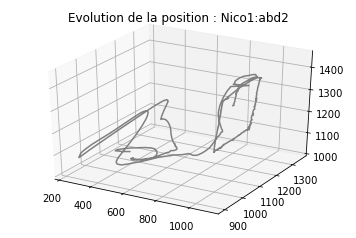

In [9]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def ev_3D_marker_mocap(seg):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x=mocap_data[seg]['X'].tolist()
    y=mocap_data[seg]['Y'].tolist()
    z=mocap_data[seg]['Z'].tolist()

    ax.plot3D(x, y, z, 'gray')
    plt.title('Evolution de la position : '+seg)
    plt.show()
    
ev_3D_marker_mocap('Nico1:abd2')

### Evolution des coordonnées
On peut afficher l'évolution des différentes coordonnées de chaque marqueur. Ceci est notamment utile pour repérer la frame à laquelle nous avons fait un clap.

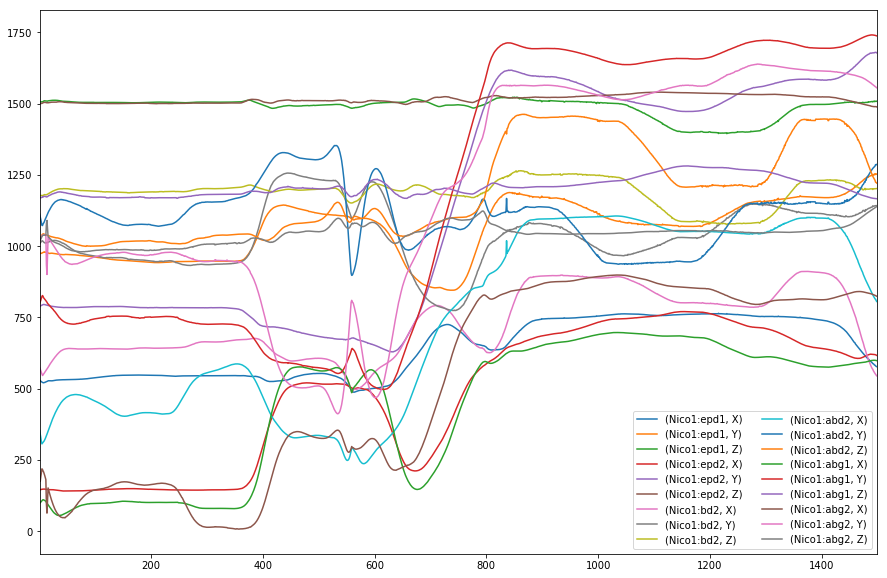

In [10]:
def evolution_coord_mocap(data,segments='all'):
    fig, ax = plt.subplots()
    if segments=='all':
        data.plot(figsize=(15,10),ax=ax)
    else :
        data.plot(y=segments,figsize=(15,10),ax=ax)
    ax.legend(ncol=2)
    plt.xlabel('frame')
    plt.ylabel('coordonnée [mm]')
    plt.show()
    
evolution_coord_mocap(mocap_data)

### Animation 3D Motion Capture

Traceback (most recent call last):
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\ReViVD\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


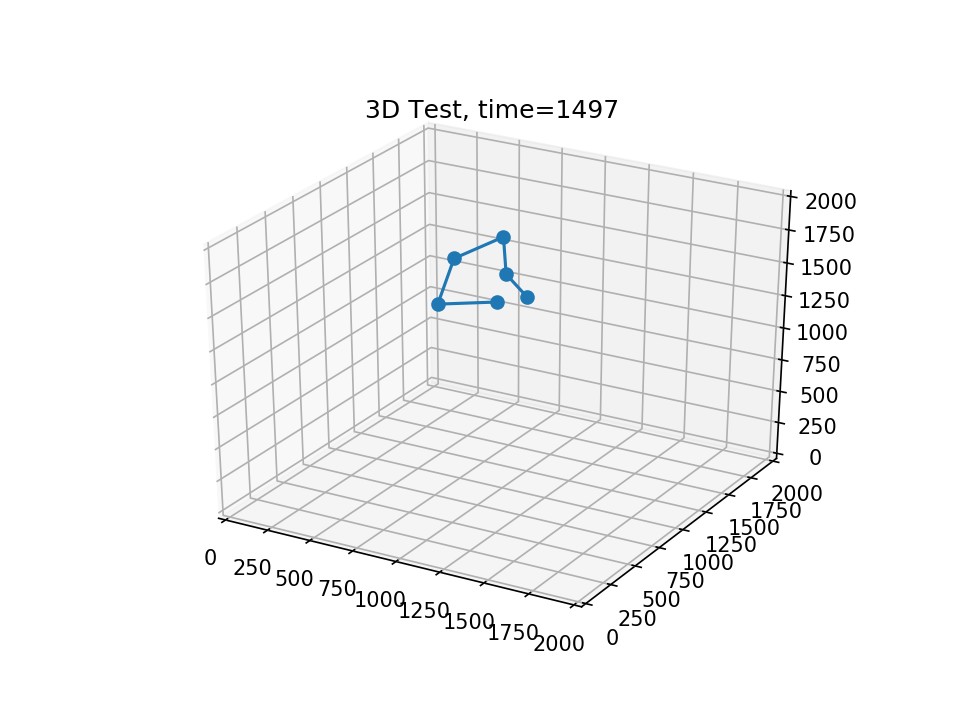

In [20]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['animation.ffmpeg_path'] = r'ffmpeg.exe'
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use("Agg")
import matplotlib.animation as animation
import pandas as pd
%matplotlib notebook

#segments=df.columns.get_level_values(level=0).unique()
segments=['Nico1:abd2','Nico1:bd2','Nico1:epd1','Nico1:epd2','Nico1:abg1','Nico1:abg2']
mocap_data

def update_graph(num):
    X,Y,Z=[],[],[]
    for seg in segments:
        data=mocap_data[seg].iloc[num]
        X.append(data.X)
        Y.append(data.Y)
        Z.append(data.Z)
    graph.set_data(X, Y)
    graph.set_3d_properties(Z)
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X,Y,Z=[],[],[]
num=0
for seg in segments:
    data=mocap_data[seg].iloc[num]
    X.append(data.X)
    Y.append(data.Y)
    Z.append(data.Z)
graph, = ax.plot(X, Y, Z, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 
                               interval=10, blit=True, repeat=False)

ax.set_xlim(0,2000)
ax.set_ylim(0,2000)
ax.set_zlim(0,2000)
#plt.xlim(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())  
#plt.ylim(df['Nico1:abd2']['Y'].min(),df['Nico1:abd2']['Y'].max())
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
ani.save('videos/MoCap_animation.mp4', writer=writer)
plt.show()

## Evolution de la vitesse
### Série temporelle

In [24]:
import numpy as np
def coord_vitesse_mocap(df,fps):
    df2=(df.shift(1)-df)*fps
    df2=df2.fillna(0)
    return df2

def apply_norm_vitesse(row,header):
    return(np.sqrt(row[header]['X']**2+row[header]['Y']**2+row[header]['Z']**2))

def norm_vitesse_mocap(df):
    headers=df.columns.get_level_values(level=0).unique()
    df2=pd.DataFrame(columns=headers)
    for header in headers:
        df2[header]=df.apply(apply_norm_vitesse,header=header,axis=1)
    return(df2)
    

mocap_coord_v=coord_vitesse_mocap(mocap_data,100)
mocap_v=norm_vitesse_mocap(mocap_coord_v)

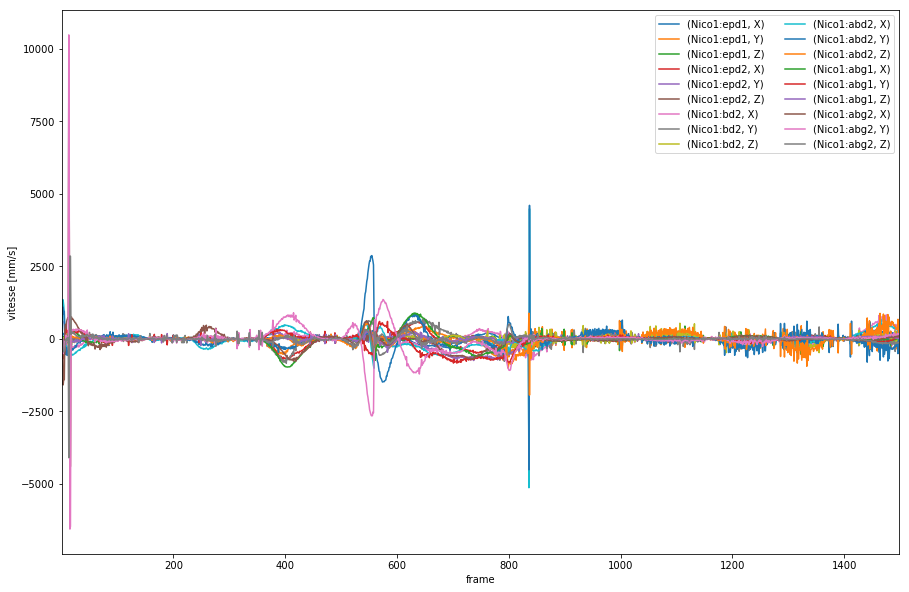

In [26]:
def evolution_norm_v(data,segments='all'):
    fig, ax = plt.subplots()
    if segments=='all':
        data.plot(figsize=(15,10),ax=ax)
    else :
        data.plot(y=segments,figsize=(15,10),ax=ax)
    ax.legend(ncol=2)
    plt.xlabel('frame')
    plt.ylabel('vitesse [mm/s]')
    plt.show()
    
evolution_norm_v(mocap_coord_v)

# Tracking OpenPose

Sur le github d'OpenPose, on trouve à quoi corresponde les coordonnées présentes dans le json [link](https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md). Il existe deux configurations Body_25 et COCO données par les images ci-dessous. 

<table>
		<tr>
			<td><img src="img\keypoints_pose_25.png", width="480"></td>
			<td><img src="img\keypoints_pose_18.png", width="480"></td>
		</tr>
</table>

Dans le cas "Body_25" les parties du corps sont les suivantes (pour COCO il suffit d'identifier les numéros communs avec Body_25) : 

In [13]:
# Resultat pour BODY_25 (25 parties du corps composées de COCO + pied)
#     {0,  "Nose"},
#     {1,  "Neck"},
#     {2,  "RShoulder"},
#     {3,  "RElbow"},
#     {4,  "RWrist"},
#     {5,  "LShoulder"},
#     {6,  "LElbow"},
#     {7,  "LWrist"},
#     {8,  "MidHip"},
#     {9,  "RHip"},
#     {10, "RKnee"},
#     {11, "RAnkle"},
#     {12, "LHip"},
#     {13, "LKnee"},
#     {14, "LAnkle"},
#     {15, "REye"},
#     {16, "LEye"},
#     {17, "REar"},
#     {18, "LEar"},
#     {19, "LBigToe"},
#     {20, "LSmallToe"},
#     {21, "LHeel"},
#     {22, "RBigToe"},
#     {23, "RSmallToe"},
#     {24, "RHeel"},
#     {25, "Background"}

## Récupération des données

In [16]:
import json
import os

def get_openpose_data(model):
    "model should be BODY_25 or COCO"
    os.chdir(r"C:\Users\ReViVD\Desktop\MultiAcqui\211019_NicoGabin_carre\OpenPose_skellington_capture\brutes")

    data=[]
    for jsonfile in os.listdir():
        if 'json' in jsonfile:
            with open(jsonfile) as j:
                people=json.loads(j.read())['people'][0]['pose_keypoints_2d']
                data.append(people)
    
    if model=='BODY_25':    
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","MidHip","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar","LBigToe","LSmallToe","LHeel","RBigToe","RSmallToe","RHeel","Background"],['x','y','c']]
    if model=='COCO':
        iterables=[["Nose","Neck","RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle","REye","LEye","REar","LEar"],['x','y','c']]
    columns=pd.MultiIndex.from_product(iterables, names=['first', 'second'])
    data=pd.DataFrame(data, columns=columns)

    os.chdir(r"C:\Users\ReViVD\Desktop\MultiAcqui\211019_NicoGabin_carre")
    return(data)

op_data=get_openpose_data('COCO')

In [17]:
op_data.head(10)

first      Nose                        Neck                    RShoulder  \
second        x        y         c        x        y         c         x   
0       860.042  412.618  0.448002  918.783  471.390  0.731785   930.653   
1       860.044  412.579  0.444097  918.768  471.431  0.738546   930.657   
2       860.037  412.587  0.435449  918.797  471.418  0.739221   930.676   
3       860.030  412.585  0.426685  918.787  471.413  0.736477   930.659   
4       860.032  412.585  0.444124  918.787  471.410  0.736323   930.664   
5       860.037  412.578  0.436364  918.772  471.416  0.735953   930.650   
6       860.036  412.585  0.419157  918.765  471.409  0.735459   930.637   
7       860.037  412.573  0.388632  918.768  471.419  0.738599   930.648   
8       860.034  412.594  0.359602  918.772  471.438  0.741690   930.672   
9       860.052  412.594  0.339810  918.775  471.425  0.743335   930.673   

first                       RElbow  ... REye     LEye                     \
second        y         c        x  ...    c        x        y         c   
0       465.599  0.724622  924.626  ...  0.0  862.861  403.762  0.531664   
1       468.437  0.726488  921.743  ...  0.0  862.874  403.718  0.522167   
2       465.600  0.725938  921.735  ...  0.0  862.865  403.723  0.512956   
3       465.594  0.726915  924.543  ...  0.0  862.862  403.717  0.505367   
4       465.598  0.725548  924.536  ...  0.0  862.870  403.728  0.521213   
5       465.605  0.725731  924.542  ...  0.0  862.873  403.707  0.511349   
6       465.594  0.726233  924.532  ...  0.0  862.863  403.716  0.498386   
7       465.602  0.727744  924.550  ...  0.0  862.857  403.706  0.471602   
8       468.426  0.728404  924.585  ...  0.0  862.846  403.716  0.445733   
9       465.603  0.729440  924.542  ...  0.0  862.856  403.724  0.431409   

first      REar                        LEar                     
second        x        y         c        x        y         c  
0       924.601  409.658  0.055200  883.362  406.607  0.938269  
1       924.592  409.675  0.056653  883.371  406.590  0.935910  
2       924.601  409.653  0.057283  883.359  406.579  0.933608  
3       924.582  409.635  0.061108  883.344  406.579  0.932502  
4       924.620  409.652  0.058610  883.357  406.599  0.937572  
5       924.610  409.647  0.060049  883.355  406.574  0.934714  
6       924.592  409.649  0.062725  883.343  406.576  0.935824  
7       924.556  409.641  0.069531  880.651  406.567  0.933179  
8       921.797  409.584  0.075649  880.625  406.549  0.928079  
9       921.775  409.586  0.077632  880.625  406.559  0.930273  

[10 rows x 54 columns]

## Tracés de la position
### Evolution des coordonnées

<IPython.core.display.Javascript object>


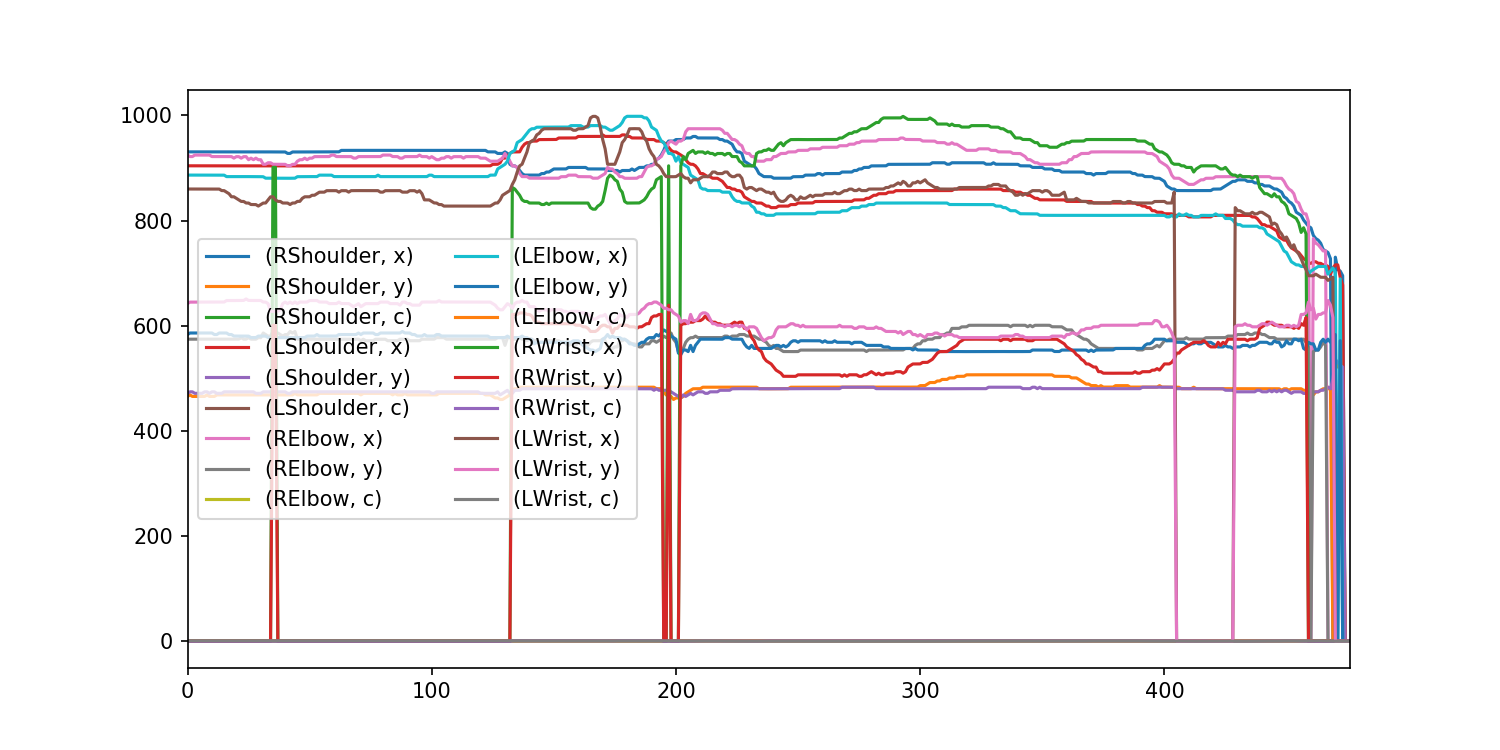

In [18]:
fig, ax = plt.subplots()
op_data2=op_data[['RShoulder','LShoulder',"RElbow","LElbow","RWrist","LWrist"]] #only same parts as MoCap
op_data2.plot(figsize=(10,5),ax=ax)
ax.legend(ncol=2)

<IPython.core.display.Javascript object>


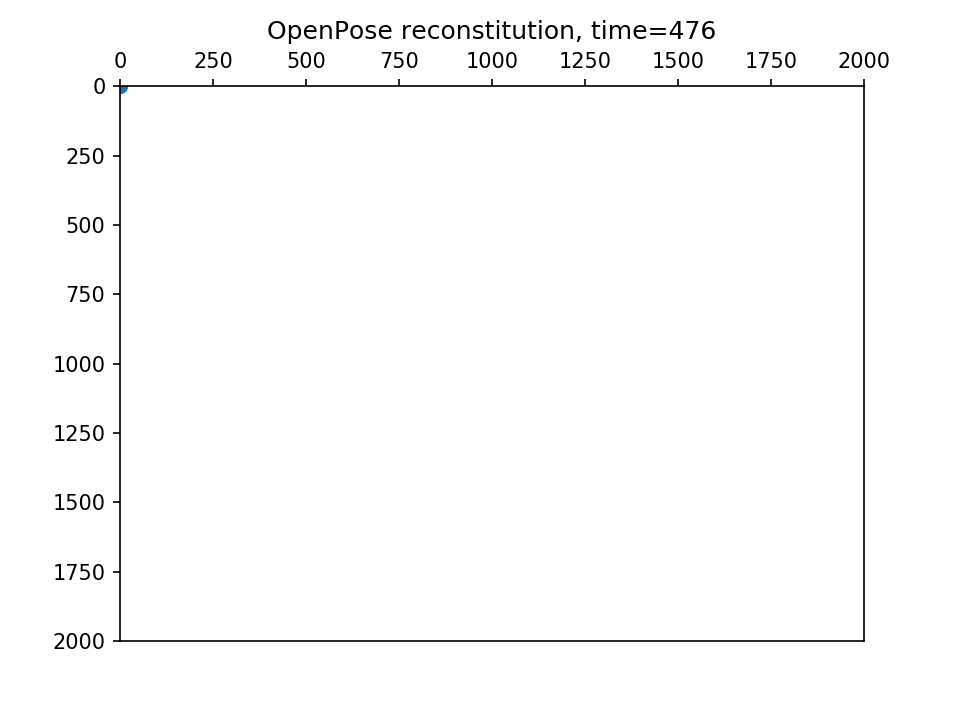

In [19]:
segments=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]
def update_graph(num):
    X,Y=[],[]
    for seg in segments:
        data=op_data2[seg].iloc[num]
        X.append(data.x)
        Y.append(data.y)
    graph.set_data(X, Y)
    title.set_text('OpenPose reconstitution, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111)
title = ax.set_title('OpenPose reconstitution')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X,Y=[],[]
num=0
for seg in segments:
    data=op_data2[seg].iloc[num]
    X.append(data.x)
    Y.append(data.y)
graph, = ax.plot(X, Y, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 
                               interval=40, blit=True, repeat=False)

ax.set_xlim(0,2000)
ax.set_ylim(0,2000)
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.tick_left()
ax.xaxis.tick_top() 
#plt.xlim(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())  
#plt.ylim(df['Nico1:abd2']['Y'].min(),df['Nico1:abd2']['Y'].max())
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
ani.save('videos/OpenPose_animation.mp4', writer=writer)
plt.show()

#segments=['RShoulder','LShoulder',"RElbow","LElbow","RWrist","LWrist"]
#anim_OpenPose(segments,df2)

Pour chaque keypoint, on a les valeurs de position x,y et la valeur de confiance c comprise entre 0 et 1. On remarque que certaines valeurs de x,y sont 0 : il s'agit des instants où le point n'est pas détecté par OpenPose. Nous allons remplacer ces 0 par les dernières valeurs connues de x,y afin d'avoir une meilleur visualisation.

In [28]:
def change0_to_old_value(df): 
    for row ,row_bef in zip(df.itertuples(),df.shift(1).itertuples()):
        for header in df.columns.get_level_values(level=0).unique():
            print(row)
            x=getattr(row,'RShoulder')
            print(x)
            y=getattr(row,'y')
            if row[header]['x']==0:
                row[header]['x']=row_bef[header]['x']
            if row[header]['y']==0:
                row[header]['y']=row_bef[header]['y']
                
change0_to_old_value(df2)

Pandas(Index=0, _1=930.653, _2=465.599, _3=0.724622, _4=904.156, _5=471.43, _6=0.861469, _7=924.626, _8=574.418, _9=0.113811, _10=886.503, _11=583.231, _12=0.784268, _13='NaN', _14='NaN', _15='NaN', _16=860.03, _17=642.154, _18=0.83561)


AttributeError: 'Pandas' object has no attribute 'RShoulder'

# Comparaison

Tracer différence entre Mocap et tracking en fonction de confiance

# Synchronisation

## Synchronisation temporelle
De manière visuelle, sur les graphiques précédents, il semblerait que la frame du clap soit 172 pour la vidéo et 557 pour le Mocap

<IPython.core.display.Javascript object>


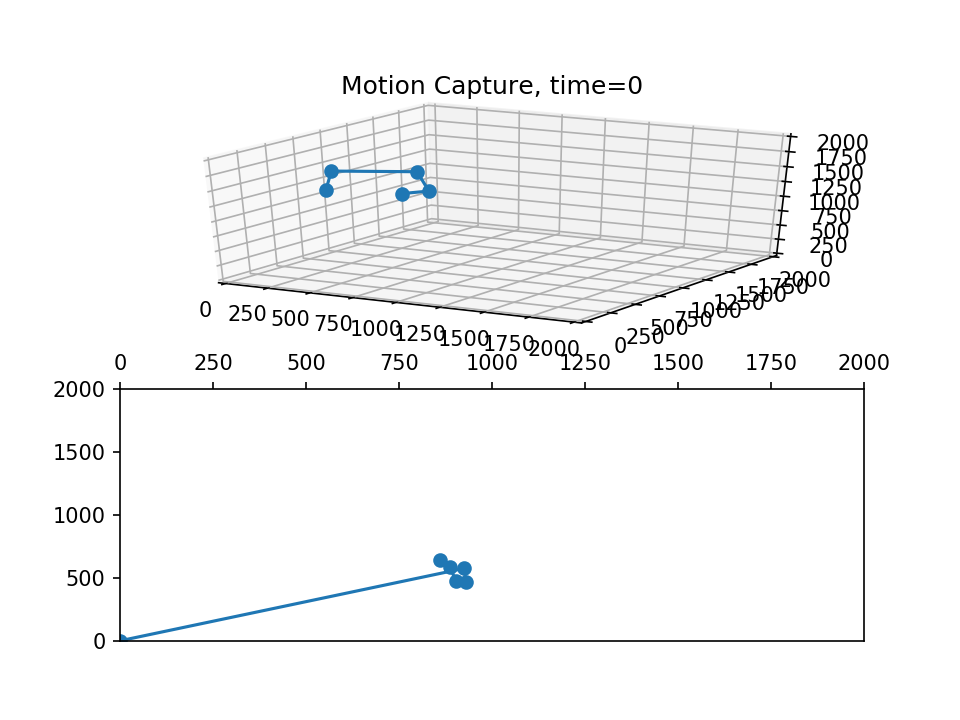

In [101]:
segments=['Nico1:abd2','Nico1:bd2','Nico1:epd1','Nico1:epd2','Nico1:abg1','Nico1:abg2']
segments2=["LWrist","LElbow",'LShoulder','RShoulder',"RElbow","RWrist"]

#def anim(segments,df):
#xdata1,ydata1,zdata1=[]
#xdata2,ydata2,zdata2=[]
def update_graph(num):
    X,Y,Z=[],[],[]
    for seg in segments:
        data=mocap_data[seg].iloc[num]
        X.append(data.X)
        Y.append(data.Y)
        Z.append(data.Z)
    graph1.set_data(X, Y)
    graph1.set_3d_properties(Z)
    title1.set_text('Motion Capture, time={}'.format(num))
    X,Y=[],[]
    
    for seg in segments2:
        data=op_data2[seg].iloc[num]
        X.append(data.x)
        Y.append(data.y)
    graph2.set_data(X, Y)
    title2.set_text('OpenPose reconstitution, time={}'.format(num))

    return graph1, graph2


fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212)
title1 = ax1.set_title('Motion Capture')
#ax.xlim=(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())

X1,Y1,Z1=[],[],[]
num1=557
for seg in segments:
    data=mocap_data[seg].iloc[num1]
    X1.append(data.X)
    Y1.append(data.Y)
    Z1.append(data.Z)
    
num2=172
X2,Y2=[],[]
for seg in segments2:
    data=op_data[seg].iloc[num2]
    X2.append(data.x)
    Y2.append(data.y)

graph1, = ax1.plot(X1, Y1, Z1, linestyle="-", marker="o")
graph2, = ax2.plot(X2, Y2, linestyle="-", marker="o")

ani = animation.FuncAnimation(fig, update_graph,
                               interval=10, blit=True, repeat=False)

ax1.set_xlim(0,2000)
ax1.set_ylim(0,2000)
ax1.set_zlim(0,2000)
ax2.set_xlim(0,2000)
ax2.set_ylim(0,2000)
ax2.set_ylim(ax.get_ylim()[::-1])
ax2.yaxis.tick_left()
ax2.xaxis.tick_top()
#plt.xlim(df['Nico1:abd2']['X'].min(),df['Nico1:abd2']['X'].max())  
#plt.ylim(df['Nico1:abd2']['Y'].min(),df['Nico1:abd2']['Y'].max())
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('MoCap_animation.mp4', writer=writer)
plt.show()

<IPython.core.display.Javascript object>


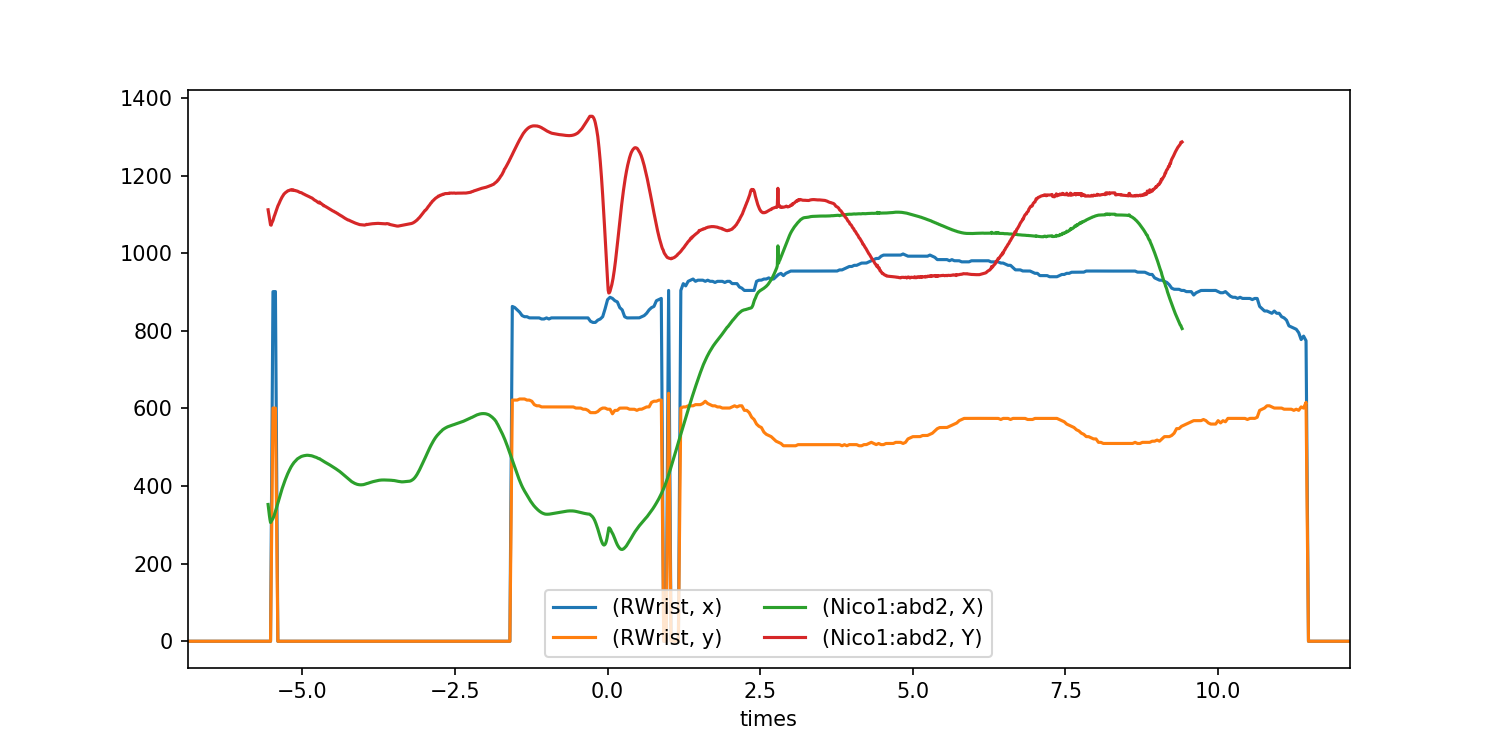

C:\Users\ReViVD\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ReViVD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
fig, ax = plt.subplots()
op_data2['times']=op_data2.index
op_data2['times']=(op_data2['times']-172)/25
op_data2.plot(x='times',y=[('RWrist','x'),('RWrist','y')],figsize=(10,5),ax=ax)

mocap_data['times']=mocap_data.index
mocap_data['times']=(mocap_data['times']-557)/100
mocap_data.plot(x='times',y=[('Nico1:abd2','X'),('Nico1:abd2','Y')],figsize=(10,5),ax=ax)

ax.legend(ncol=2)